<a href="https://colab.research.google.com/github/Rohinthraj21/computervision-project-/blob/main/computer_vision_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📤 Upload an image file...


Saving image-10.png to image-10.png


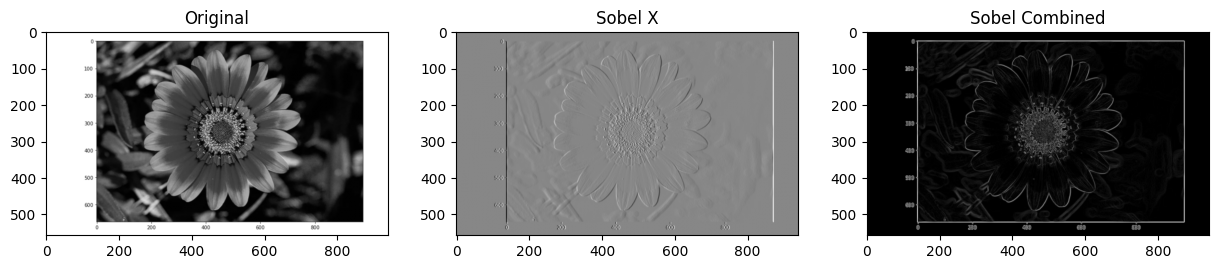

In [ ]:
# ======================================================
# 🧠 UNIT 1: Edge Detection using Sobel Operator
# ======================================================

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

print("📤 Upload an image file...")
uploaded = files.upload()

for fn in uploaded.keys():
    img = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)

# Sobel Edge Detection
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(1,3,2), plt.imshow(sobel_x, cmap='gray'), plt.title('Sobel X')
plt.subplot(1,3,3), plt.imshow(sobel_combined, cmap='gray'), plt.title('Sobel Combined')
plt.show()


📤 Upload an image with shapes...


Saving Screenshot 2025-11-05 111726.png to Screenshot 2025-11-05 111726.png


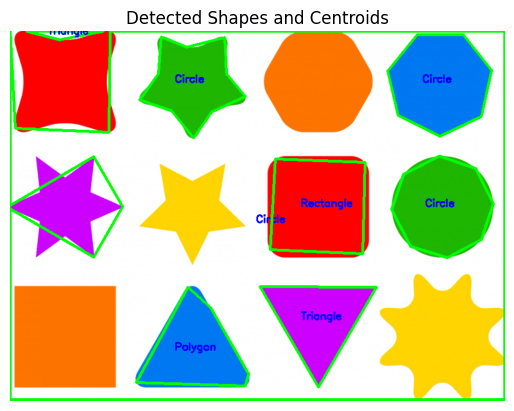

In [ ]:
# ======================================================
# 🧠 UNIT 2: Shape Detection and Classification using Contour and Centroid Analysis
# ======================================================

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

print("📤 Upload an image with shapes...")
uploaded = files.upload()

for fn in uploaded.keys():
    img = cv2.imread(fn)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
    M = cv2.moments(contour)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
    else:
        cx, cy = 0, 0

    if len(approx) == 3:
        shape = "Triangle"
    elif len(approx) == 4:
        shape = "Rectangle"
    elif len(approx) > 6:
        shape = "Circle"
    else:
        shape = "Polygon"

    cv2.drawContours(img, [approx], 0, (0, 255, 0), 3)
    cv2.putText(img, shape, (cx - 30, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Detected Shapes and Centroids")
plt.axis('off')
plt.show()


📤 Upload an image for line/circle detection...


Saving image-10.png to image-10 (2).png


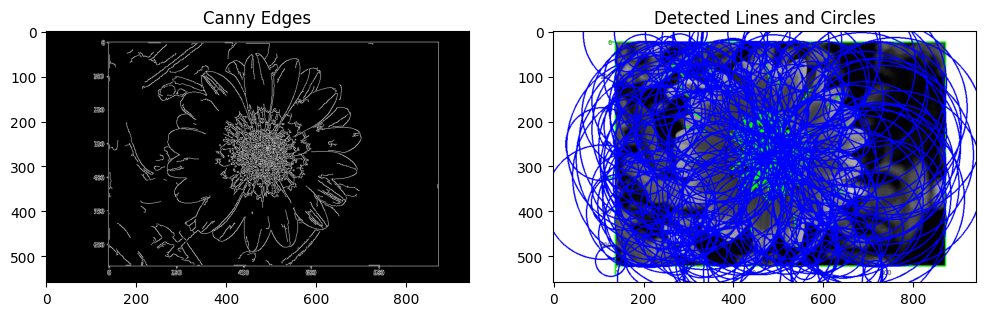

In [ ]:
# ======================================================
# 🧠 UNIT 3: Line and Circle Detection using Hough Transform
# ======================================================

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

print("📤 Upload an image for line/circle detection...")
uploaded = files.upload()

for fn in uploaded.keys():
    img = cv2.imread(fn)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)

# Detect lines
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 80, minLineLength=30, maxLineGap=10)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Detect circles
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=100, param2=30, minRadius=10, maxRadius=200)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for c in circles[0, :]:
        cv2.circle(img, (c[0], c[1]), c[2], (255, 0, 0), 2)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1), plt.imshow(edges, cmap='gray'), plt.title('Canny Edges')
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Detected Lines and Circles')
plt.show()


📤 Please upload 5 face images (JPG/PNG)


Saving download (1).jpg to download (1).jpg
Saving download.jpg to download.jpg
Saving images (1).jpg to images (1).jpg
Saving images (2).jpg to images (2).jpg
Saving images.jpg to images.jpg


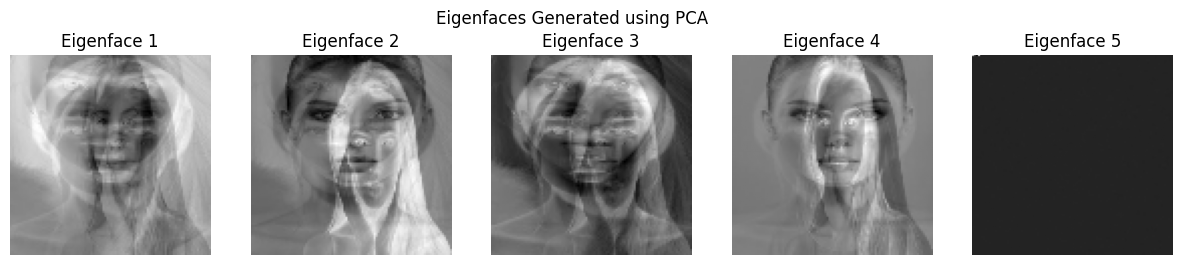

✅ Uploaded Images: 5
✅ PCA Components Shape: (5, 10000)


In [ ]:
# ======================================================
# 🧠 UNIT 4: Face Recognition using Eigenfaces (PCA)
# ✅ Upload 5 face images manually
# ======================================================

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from google.colab import files

print("📤 Please upload 5 face images (JPG/PNG)")
uploaded = files.upload()

image_files = list(uploaded.keys())
images = []

# Process each uploaded image
for file in image_files:
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)  # convert to gray

    if img is None:
        print(f"❌ Error reading {file}, skipping...")
        continue

    img = cv2.resize(img, (100, 100))             # resize to fixed size
    images.append(img.flatten())                  # flatten to 1D

# Convert list to numpy array
X = np.array(images)

# Ensure at least 2 images for PCA
if len(X) < 2:
    raise ValueError("⚠️ Please upload at least 2 face images to perform PCA!")

# Apply PCA
num_components = min(5, len(X))
pca = PCA(n_components=num_components).fit(X)

eigenfaces = pca.components_.reshape((num_components, 100, 100))

# Display Eigenfaces
fig, axes = plt.subplots(1, num_components, figsize=(15,3))
for i in range(num_components):
    axes[i].imshow(eigenfaces[i], cmap='gray')
    axes[i].set_title(f"Eigenface {i+1}")
    axes[i].axis('off')

plt.suptitle("Eigenfaces Generated using PCA")
plt.show()

print(f"✅ Uploaded Images: {len(X)}")
print("✅ PCA Components Shape:", pca.components_.shape)


📤 Upload a road image (with lanes visible)...


Saving download (2).jpg to download (2).jpg


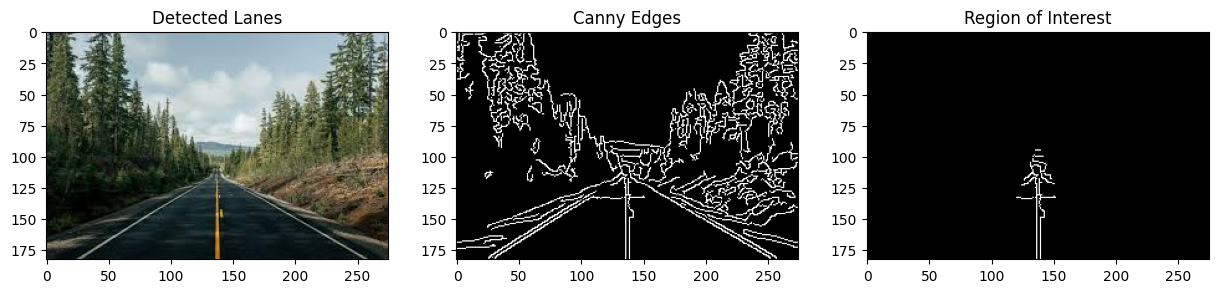

In [ ]:
# ======================================================
# 🧠 UNIT 5: Road Lane Detection using Canny Edge and Hough Transform
# ======================================================

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

print("📤 Upload a road image (with lanes visible)...")
uploaded = files.upload()

for fn in uploaded.keys():
    img = cv2.imread(fn)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    edges = cv2.Canny(blur, 50, 150)

# Define region of interest
mask = np.zeros_like(edges)
height, width = edges.shape
triangle = np.array([[(100,height),(width//2, height//2),(width-100,height)]])
cv2.fillPoly(mask, triangle, 255)
masked_edges = cv2.bitwise_and(edges, mask)

# Hough Line detection
lines = cv2.HoughLinesP(masked_edges, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img, (x1, y1), (x2, y2), (0,255,0), 3)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title("Detected Lanes")
plt.subplot(1,3,2), plt.imshow(edges, cmap='gray'), plt.title("Canny Edges")
plt.subplot(1,3,3), plt.imshow(masked_edges, cmap='gray'), plt.title("Region of Interest")
plt.show()
